In [197]:
import torch
import matplotlib.pyplot as plt

In [198]:
K = 512
P = 256
F = 128
UP=25

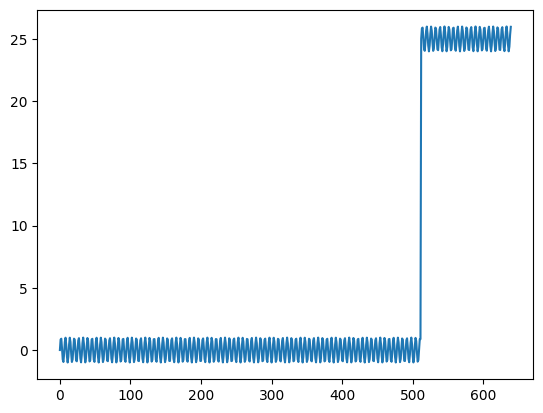

In [199]:
x_past = torch.sin(torch.arange(K))
x_future = torch.sin(torch.arange(F)) + UP
x = torch.cat([x_past, x_future])
t = torch.arange(K + F)
plt.plot(x)
# plt.axis('off')

In [200]:
from paprika import *


@data
class Segment:
    start: float = 0
    end: float = 0
    title: str = ""
    y: float = 0

    def get(self):
        return (self.start, self.end)

    def draw(self):
        plt.plot(self.get(), [self.y, self.y], color="blue", linewidth=2)

        # 添加注释显示距离
        plt.annotate(
            self.title,
            xy=((self.start + self.end) / 2, self.y),
            xytext=(-20, 20),  # 文本位置和偏移量
            textcoords="offset points",
            ha="center",
            va="bottom",
            bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
        )


future_segment = Segment(start=K, end=K + F, y=UP, title="F")

([], [])

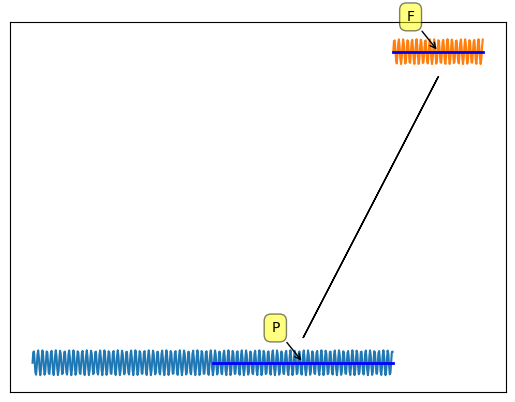

In [201]:
# plt.figure(figsize=(24, 16))
plt.plot(t[:K], x_past)
plt.plot(t[K : K + F], x_future)


future_segment.draw()

segments = [
    Segment(K - P, K, title="P"),
]

for s in segments:
    # plt.axvline(x=s.start, color="g")
    # plt.axvline(x=s.end, color="g")
    # 画线段表示距离
    s.draw()

    arrow_start = (s.start + s.end) / 2
    arrow_end = (future_segment.start + future_segment.end) / 2
    arrow_delta = arrow_end - arrow_start
    plt.arrow(
        arrow_start,
        s.y + 2,
        arrow_delta,
        future_segment.y-4,
    )
    
plt.xticks([])
plt.yticks([])

([], [])

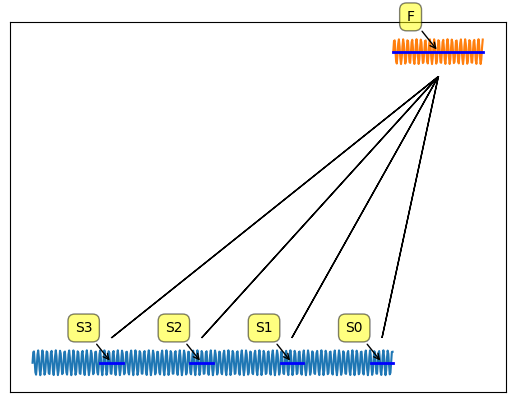

In [202]:
# plt.figure(figsize=(24, 16))
plt.plot(t[:K], x_past)
plt.plot(t[K : K + F], x_future)


future_segment.draw()

T = 128
P1 = 32

segments = []

m = 3

for i in range(m + 1):
    segments.append(Segment(K - P1 - i * T, K - i * T, title=f"S{i}"))

for s in segments:
    # plt.axvline(x=s.start, color="g")
    # plt.axvline(x=s.end, color="g")
    # 画线段表示距离
    s.draw()

    arrow_start = (s.start + s.end) / 2
    arrow_end = (future_segment.start + future_segment.end) / 2
    arrow_delta = arrow_end - arrow_start
    plt.arrow(
        arrow_start,
        s.y + 2,
        arrow_delta,
        future_segment.y - 4,
    )
    
plt.xticks([])
plt.yticks([])